### Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dimensionality Reduction - defensive actions: Identify and seperate player characteristics

#### Inspect

In [2]:
df = pd.read_csv("../data/fbref/cleaned/defensive_actions.csv")
print(df['Pos'].unique())
df = df.loc[(df['Pos'] ==  "DF") | (df['Pos'] == "MF") | (df['Pos'] == "FW")]

features = ["Pos",'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd',
       'Tackles_Att 3rd', 'Challenges_Tkl', 'Challenges_Att',
       'Challenges_Tkl%', 'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh',
       'Blocks_Pass', 'Interceptions', 'Tkl+Interceptions', 'Clearances',
       'Errors']

df = df[features]
df.head()

['GK' 'MF' 'FW' 'DF' 'MF,FW' 'FW,MF' 'DF,MF' 'DF,FW' 'MF,DF' 'FW,DF']


Pos  Tackles_Tkl  Tackles_TklW  Tackles_Def 3rd  Tackles_Mid 3rd  \
1  MF         67.0          41.0             28.0             28.0   
2  FW          3.0           2.0              0.0              2.0   
3  MF         28.0          12.0              3.0             12.0   
4  MF         30.0          18.0              7.0             13.0   
5  DF         36.0          25.0             15.0             18.0   

   Tackles_Att 3rd  Challenges_Tkl  Challenges_Att  Challenges_Tkl%  \
1             11.0            26.0            52.0             50.0   
2              1.0             1.0             5.0             20.0   
3             13.0            14.0            39.0             35.9   
4             10.0            12.0            33.0             36.4   
5              3.0            23.0            36.0             63.9   

   Challenges_Lost  Blocks_Blocks  Blocks_Sh  Blocks_Pass  Interceptions  \
1             26.0           40.0       14.0         26.0           33.0   
2              4.0           12.0        4.0          8.0            3.0   
3             25.0           27.0        2.0         25.0            9.0   
4             21.0           18.0        3.0         15.0           20.0   
5             13.0           27.0        9.0         18.0           16.0   

   Tkl+Interceptions  Clearances  Errors  
1              100.0        43.0     1.0  
2                6.0        14.0     0.0  
3               37.0        10.0     0.0  
4               50.0        13.0     0.0  
5               52.0        33.0     0.0

#### Scatter plot defensive attributes

In [3]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="Pos")

#### Visualize PCA components 2D

In [4]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = ['Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd',
       'Tackles_Att 3rd', 'Challenges_Tkl', 'Challenges_Att',
       'Challenges_Tkl%', 'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh',
       'Blocks_Pass', 'Interceptions', 'Tkl+Interceptions', 'Clearances',
       'Errors']
df = df.dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

pca = PCA()
components = pca.fit_transform(df_scaled)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
print(f"Original Dimension: {len(features)}")
display(labels)

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["Pos"]
)
fig.update_traces(diagonal_visible=False, marker_size=3)

fig.show()


Original Dimension: 16


{'0': 'PC 1 (65.0%)',
 '1': 'PC 2 (13.8%)',
 '2': 'PC 3 (6.0%)',
 '3': 'PC 4 (4.8%)',
 '4': 'PC 5 (3.2%)',
 '5': 'PC 6 (1.9%)',
 '6': 'PC 7 (1.6%)',
 '7': 'PC 8 (1.3%)',
 '8': 'PC 9 (1.2%)',
 '9': 'PC 10 (0.7%)',
 '10': 'PC 11 (0.4%)',
 '11': 'PC 12 (0.2%)',
 '12': 'PC 13 (0.0%)',
 '13': 'PC 14 (0.0%)',
 '14': 'PC 15 (0.0%)',
 '15': 'PC 16 (0.0%)'}

#### Visualize PCA components 3D

In [5]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = ['Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd',
       'Tackles_Att 3rd', 'Challenges_Tkl', 'Challenges_Att',
       'Challenges_Tkl%', 'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh',
       'Blocks_Pass', 'Interceptions', 'Tkl+Interceptions', 'Clearances',
       'Errors']
df = df.dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Pos'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_traces(marker_size=3)
fig.show()


#### PCA: Inspect difference between MF/FW and MF

In [6]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/fbref/cleaned/defensive_actions.csv")
print(df['Pos'].unique())
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "FW,DF")]

features = ['Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd',
       'Tackles_Att 3rd', 'Challenges_Tkl', 'Challenges_Att',
       'Challenges_Tkl%', 'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh',
       'Blocks_Pass', 'Interceptions', 'Tkl+Interceptions', 'Clearances',
       'Errors']
df = df.dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Pos'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_traces(marker_size=3)
fig.show()


['GK' 'MF' 'FW' 'DF' 'MF,FW' 'FW,MF' 'DF,MF' 'DF,FW' 'MF,DF' 'FW,DF']


#### Visualize tSNE components 2D

In [7]:
from sklearn.manifold import TSNE
import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/defensive_actions.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(df[features])

fig = px.scatter(
    projections, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig.update_traces(marker_size=3)
fig.show()

#### Visualize tSNE components 3D

In [8]:
from sklearn.manifold import TSNE
import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/defensive_actions.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

tsne = TSNE(n_components=3, random_state=42)
projections = tsne.fit_transform(df[features])

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)

fig.update_traces(marker_size=3)
fig.show()

#### Visualize UMAP components 2D & 3D

In [10]:
from umap import UMAP
import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/defensive_actions.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df[features])
proj_3d = umap_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### Dimensionality Reduction - shooting: Identify and seperate player characteristics

In [48]:
df = pd.read_csv("../data/fbref/cleaned/shooting.csv")
print(df.columns)

features = ['Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
           'PK', 'PKatt', 'FK', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']


Index(['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age', '90s',
       'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
       'PK', 'PKatt', 'FK', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')


#### PCA - Visualization

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/shooting.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

proj_2d = pca_2d.fit_transform(df_scaled)
proj_3d = pca_3d.fit_transform(df_scaled)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

#### UMAP - Visualization

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/shooting.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df[features])
proj_3d = umap_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### Dimensionality Reduction - possession: Identify and seperate player characteristics

In [57]:
df = pd.read_csv("../data/fbref/cleaned/possession.csv")
print(df.columns)


features = ['Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live',
       'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld',
       'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR']

Index(['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age', '90s',
       'Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live',
       'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld',
       'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR'],
      dtype='object')


#### PCA - Visualization

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/possession.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

proj_2d = pca_2d.fit_transform(df_scaled)
proj_3d = pca_3d.fit_transform(df_scaled)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

#### UMAP - Visualization

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/possession.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df[features])
proj_3d = umap_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### Dimensionality Reduction - passing: Identify and seperate player characteristics

In [69]:
df = pd.read_csv("../data/fbref/cleaned/passing.csv")
print(df.columns)


features = ['Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist',
       'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp',
       'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%',
       'Assists', 'xAG', 'Key Passes', 'Passes_to_1/3',
       'Passes_to_Penalt_Area', 'Crosses_into_Penalty_Area',
       'Progressive Passes', 'Expected_xA', 'Expected_A-xAG']

Index(['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age', '90s',
       'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist',
       'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp',
       'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%',
       'Assists', 'xAG', 'Key Passes', 'Passes_to_1/3',
       'Passes_to_Penalt_Area', 'Crosses_into_Penalty_Area',
       'Progressive Passes', 'Expected_xA', 'Expected_A-xAG'],
      dtype='object')


#### PCA - Visualization

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/passing.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

proj_2d = pca_2d.fit_transform(df_scaled)
proj_3d = pca_3d.fit_transform(df_scaled)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=3)

fig_2d.show()
fig_3d.show()

#### UMAP - Visualization

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/passing.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df[features])
proj_3d = umap_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#### tSNE - Visualization

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/passing.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

tsne_2d = TSNE(n_components=2, random_state=42)
tsne_3d = TSNE(n_components=3, random_state=42)

proj_2d = tsne_2d.fit_transform(df[features])
proj_3d = tsne_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

print(tsne_3d.kl_divergence_)

fig_2d.show()
fig_3d.show()


0.3938899636268616


In [ ]:
df = pd.read_csv("../data/fbref/cleaned/passing.csv")
print(df.columns)


features = ['Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist',
       'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp',
       'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%',
       'Assists', 'xAG', 'Key Passes', 'Passes_to_1/3',
       'Passes_to_Penalt_Area', 'Crosses_into_Penalty_Area',
       'Progressive Passes', 'Expected_xA', 'Expected_A-xAG']

Index(['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age', '90s',
       'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist',
       'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp',
       'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%',
       'Assists', 'xAG', 'Key Passes', 'Passes_to_1/3',
       'Passes_to_Penalt_Area', 'Crosses_into_Penalty_Area',
       'Progressive Passes', 'Expected_xA', 'Expected_A-xAG'],
      dtype='object')


### Dimensionality Reduction - goal and shot creation: Identify and seperate player characteristics

#### PCA - Visualization

In [84]:
df = pd.read_csv("../data/fbref/cleaned/goal_and_shot_creation.csv")
print(df.columns)

features = ['SCA_SCA', 'SCA_SCA90', 'SCA Types_PassLive', 'SCA Types_PassDead',
       'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def',
       'GCA_GCA', 'GCA_GCA90', 'GCA Types_PassLive', 'GCA Types_PassDead',
       'GCA Types_TO', 'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def']

Index(['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age', '90s',
       'SCA_SCA', 'SCA_SCA90', 'SCA Types_PassLive', 'SCA Types_PassDead',
       'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def',
       'GCA_GCA', 'GCA_GCA90', 'GCA Types_PassLive', 'GCA Types_PassDead',
       'GCA Types_TO', 'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def'],
      dtype='object')


In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/goal_and_shot_creation.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

proj_2d = pca_2d.fit_transform(df_scaled)
proj_3d = pca_3d.fit_transform(df_scaled)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=3)

fig_2d.show()
fig_3d.show()

#### UMAP - Visualization

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/goal_and_shot_creation.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df[features])
proj_3d = umap_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#### tSNE - Visualization

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px

df = pd.read_csv("../data/fbref/cleaned/goal_and_shot_creation.csv")
df = df.loc[(df['Pos'] == "MF") | (df['Pos'] == "DF")| (df['Pos'] == "FW")]
df = df.dropna()

tsne_2d = TSNE(n_components=2, random_state=42)
tsne_3d = TSNE(n_components=3, random_state=42)

proj_2d = tsne_2d.fit_transform(df[features])
proj_3d = tsne_3d.fit_transform(df[features])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.Pos, labels={'color': 'Pos'}
)
fig_3d.update_traces(marker_size=5)

print(tsne_3d.kl_divergence_)

fig_2d.show()
fig_3d.show()


0.6515630483627319


### Inspect Goalkeeper

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/df_goalkeeper.csv", sep=',')
df_goalkeeper = df.copy()

def clean_gk_column(string):
    html_string = '<span class="pos pos16">LM'

    # Define a regular expression pattern to match HTML tags
    html_tags_pattern = re.compile(r'<.*?>')

    # Use the sub() function to replace matched HTML tags with an empty string
    cleaned_string = html_tags_pattern.sub('', str(string))
    return cleaned_string

# clean Position column
df_goalkeeper['Position'] = df_goalkeeper['Position'].apply(clean_gk_column)
# select only goal keeper
df_goalkeeper = df_goalkeeper[df_goalkeeper['Position'] == 'GK']

# remove columns:
columns_to_keep_gk = ['Age','GKDiving', 'GKKicking', 'GKPositioning', 'GKReflexes','Reactions', 'Vision', 'Composure','LongPassing', 'Strength','Jumping', 'Overall']
df_goalkeeper = df_goalkeeper[columns_to_keep_gk]


# handle naivly NaN's
df_goalkeeper.loc[df_goalkeeper['Composure'].isna(), 'Composure'] = df_goalkeeper['Composure'].median()
df_goalkeeper.loc[df_goalkeeper['Jumping'].isna(), 'Jumping'] = df_goalkeeper['Jumping'].median()
df_goalkeeper.loc[df_goalkeeper['Vision'].isna(), 'Vision'] = df_goalkeeper['Vision'].median()

# store data frame
# df_goalkeeper.to_csv('../data/df_goalkeeper.csv', sep=',')
display(df_goalkeeper)

Age  GKDiving  GKKicking  GKPositioning  GKReflexes  Reactions  Vision  \
0     40      78.0       90.0           84.0        70.0       75.0    25.0   
1     27      87.0       93.0           88.0        88.0       88.0    70.0   
2     35      88.0       91.0           89.0        88.0       87.0    70.0   
3     27      83.0       87.0           80.0        86.0       80.0    69.0   
4     24      84.0       87.0           83.0        86.0       83.0    64.0   
..   ...       ...        ...            ...         ...        ...     ...   
567   24      57.0       57.0           60.0        59.0       53.0    29.0   
568   18      60.0       59.0           57.0        59.0       52.0    22.0   
569   18      59.0       52.0           49.0        61.0       48.0    26.0   
570   22      61.0       57.0           58.0        59.0       45.0    25.0   
571   25      58.0       47.0           54.0        61.0       52.0    27.0   

     Composure  LongPassing  Strength  Jumping  Overall  
0         49.0         58.0      72.0     66.0       75  
1         70.0         66.0      78.0     66.0       89  
2         70.0         68.0      80.0     77.0       90  
3         65.0         56.0      70.0     77.0       83  
4         64.0         53.0      79.0     80.0       84  
..         ...          ...       ...      ...      ...  
567       29.0         16.0      56.0     47.0       59  
568       26.0         16.0      58.0     33.0       59  
569       30.0         19.0      55.0     42.0       56  
570       36.0         20.0      60.0     33.0       59  
571       32.0         20.0      63.0     41.0       58  

[572 rows x 12 columns]

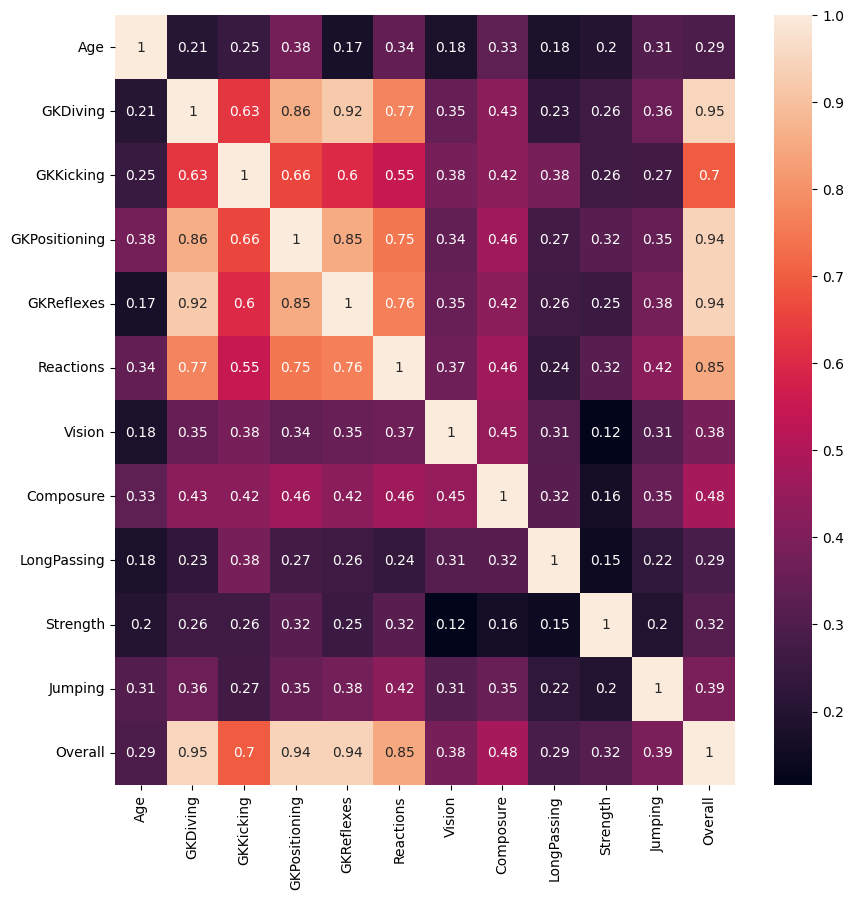

In [ ]:
corr_matrix = df_goalkeeper.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Plot and investigate Midfilder
The goal is to plot midfilder on different attributes to indicate clusters that can be approved but domain knowledge.
Consider only players that have played a significant amount of matches and playing minutes.

In [2]:
df = pd.read_csv('../data/fbref/player_stats.csv')
df = df.set_index('unique_id')
df = df.loc[(df['Playing Time_Starts'] > 8 ) & (df['Playing Time_Minutes'] > 60) & (df['Global Pos'] == 'MF')]
df.columns

Index(['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age',
       'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s',
       ...
       'Goals', 'Shots', 'Shots.1', 'SoT', 'SoT%', 'Shots.2', 'Shots.3',
       'Goals/Shot', 'Goals/SoT', 'Global Pos'],
      dtype='object', length=176)

Plot midfielder passing qualities

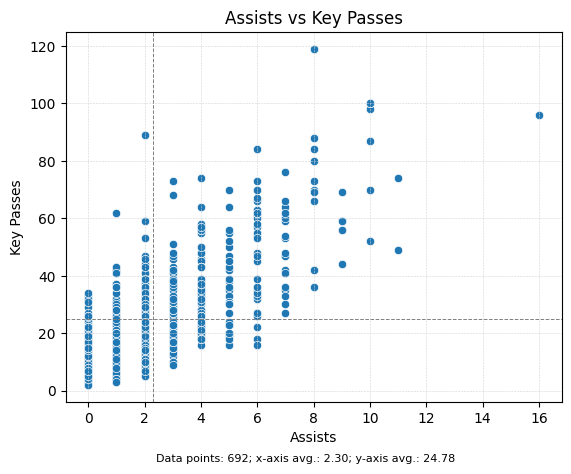

In [17]:
def plot(x, y, hue=None):    
    if hue is not None:
        sns.scatterplot(x=x, y=y, hue=hue)
    else:
        sns.scatterplot(x=x, y=y)

    plt.title(f"{x.name} vs {y.name}")
    plt.suptitle(f"Data points: {len(x)}; x-axis avg.: {x.mean():.2f}; y-axis avg.: {y.mean():.2f}", y=.001, fontsize=8)
    plt.axhline(y=y.mean(), color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(x=x.mean(), color='grey', linestyle='--', linewidth=0.7)
    plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.4)

    plt.show()

# 'Assists' vs 'Key Passes'
data = df[['Assists', 'Key Passes','Global Pos','Team','League']]
x = data['Assists']
y = data['Key Passes']
#categorial = data['Global Pos']

plot(x, y)

In [ ]:
data['Key Passes'].mean()

24.777456647398843